# Title

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Sum of frequency per content per year in types/context date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Plot line graphs</span>](#4)  <a id="four"></a>   

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../sonata")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../../data/Sonata_data_main.csv") 

bay_of_naples = ["villa arianna, stabiae", "villa san marco, stabiae",  "cuma, tete de cire, phase 2.", "cuma, tete de cire, phase 4.", "rione terra, puteoli",  "casa di ariadna, pompeii", "cratere senga, puteoli"]
data = data[(data["Grouped_sites"] !="roma") & (data["Grouped_sites"] !="ostia") & (~data["Site"].isin(bay_of_naples))]

content = ["fish sauce", "olive oil", "wine", "unknown"]
start_dates = ["Amphora_type_lower_date", "Lower_context_date"]
end_dates = ["Amphora_type_upper_date", "Upper_context_date"]

freq_type_dates = {}
freq_context_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Sum of frequency per content per year in types/context date ranges</span>](#three) <a id="3"></a>

In [3]:
for cont in content:
    for start, end in zip(start_dates, end_dates):
        
        df = data.groupby(["Amphora_type", start, end, "content"])["Frequency"].sum()
        df = df.reset_index()
        df = df.rename(columns = {"Frequency":"summed_freq"})
        
        df1 = sum_freq_per_year(data = df,
                                sum_freq = "summed_freq",
                                lower_date = start,
                                upper_date = end)
                                
        freq = year_freq_df(data = df1[df1["content"] == cont],     
                            lower_date = start,
                            upper_date = end,
                            sum_freq = "Sum_freq_per_year")  

        label = cont.capitalize()
        
        if "Amphora" in start or "Amphora" in  end:   
            freq_type_dates[label] = freq
        else:
            freq_context_dates[label] = freq
            
list_of_dfs.append(freq_type_dates)
list_of_dfs.append(freq_context_dates)

### [<span style="color:black">4. Plot line graphs</span>](#four) <a id="4"></a>  

/tmp/ipykernel_4494/2675159081.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_4494/2675159081.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


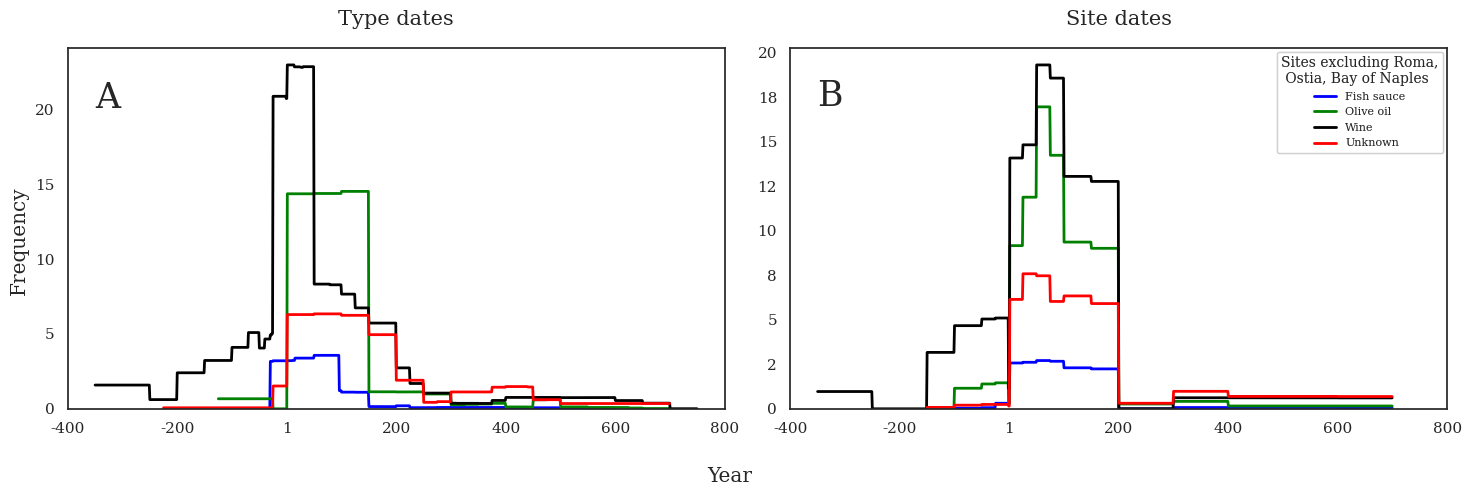

In [14]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_xlim([-400, 800])
axs[1].set_xlim([-400, 800])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["blue", "green", "black", "red"],
               ax = ax,
               linewidth = 2)

    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.get_legend().remove()
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, title="Sites excluding Roma,\n Ostia, Bay of Naples",  title_fontproperties = {"size":10}, bbox_to_anchor=(0.979, 0.89), fontsize = 8)

axs[0].set_title(label = "Type dates", y=1.04, size=15)
axs[1].set_title(label = "Site dates", y=1.04, size=15)

fig.supxlabel("Year")
fig.supylabel("Frequency")

axs[0].text(-350, 20.05, "A", fontsize = 25)
axs[1].text(-350, 17, "B", fontsize = 25)

plt.tight_layout()
plt.savefig("../../figs/Fig13a-b.png", bbox_inches="tight")